In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=3,suppress=True)

import tensorflow as tf

In [3]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']
)

In [4]:
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [5]:
abalone_features  = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [7]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [8]:
abalone_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

abalone_model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam()
)

In [9]:
abalone_model.fit(abalone_features,abalone_labels,epochs = 10)

Epoch 1/10
104/104 [==============================] - 2s 2ms/step - loss: 72.2048
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 13.2343
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 8.1915
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 7.7866
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 7.4225
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 7.1224
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 6.8863
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.7144
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 6.5816
Epoch 10/10
104/104 [==============================] - 0s 1ms/step - loss: 6.4943


In [10]:
normalize = tf.keras.layers.Normalization()

In [12]:
normalize.adapt(abalone_features)

In [13]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

In [15]:
norm_abalone_model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam()
)
norm_abalone_model.fit(abalone_features,abalone_labels,epochs = 10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 94.4864
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 57.5177
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 19.3579
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 6.2287
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0559
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9971
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9683
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9548
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9673
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9456


# Mixed Data Type CSV File

In [16]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [17]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

Because of the different data types and ranges, you can't simply stack the features into a NumPy array and pass it to a tf.keras.Sequential model. Each column needs to be handled individually.

As one option, you could preprocess your data offline (using any tool you like) to convert categorical columns to numeric columns, then pass the processed output to your TensorFlow model. The disadvantage to that approach is that if you save and export your model the preprocessing is not saved with it. The **Keras preprocessing layers** avoid this problem because they're part of the model.

In [18]:
input = tf.keras.Input(shape = (),dtype=tf.float32)
result = 2*input+1
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [19]:
calc = tf.keras.Model(inputs = input,outputs = result)

In [20]:
calc

In [25]:
calc(np.array([1,2,3]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([3., 5., 7.], dtype=float32)>

To build the preprocessing model, start by building a set of symbolic tf.keras.Input objects, matching the names and data-types of the csv columns

In [87]:
inputs = {}
for name,column in titanic_features.items():
    dtype = column.dtype
    if dtype==object:
        dtype=tf.string
    else:
        dtype=tf.float32

    inputs[name] = tf.keras.Input(shape=(1,),name = name,dtype=dtype)

In [88]:
inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [90]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_8')>

In [91]:
preprocessed_inputs = [all_numeric_inputs]

In [92]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

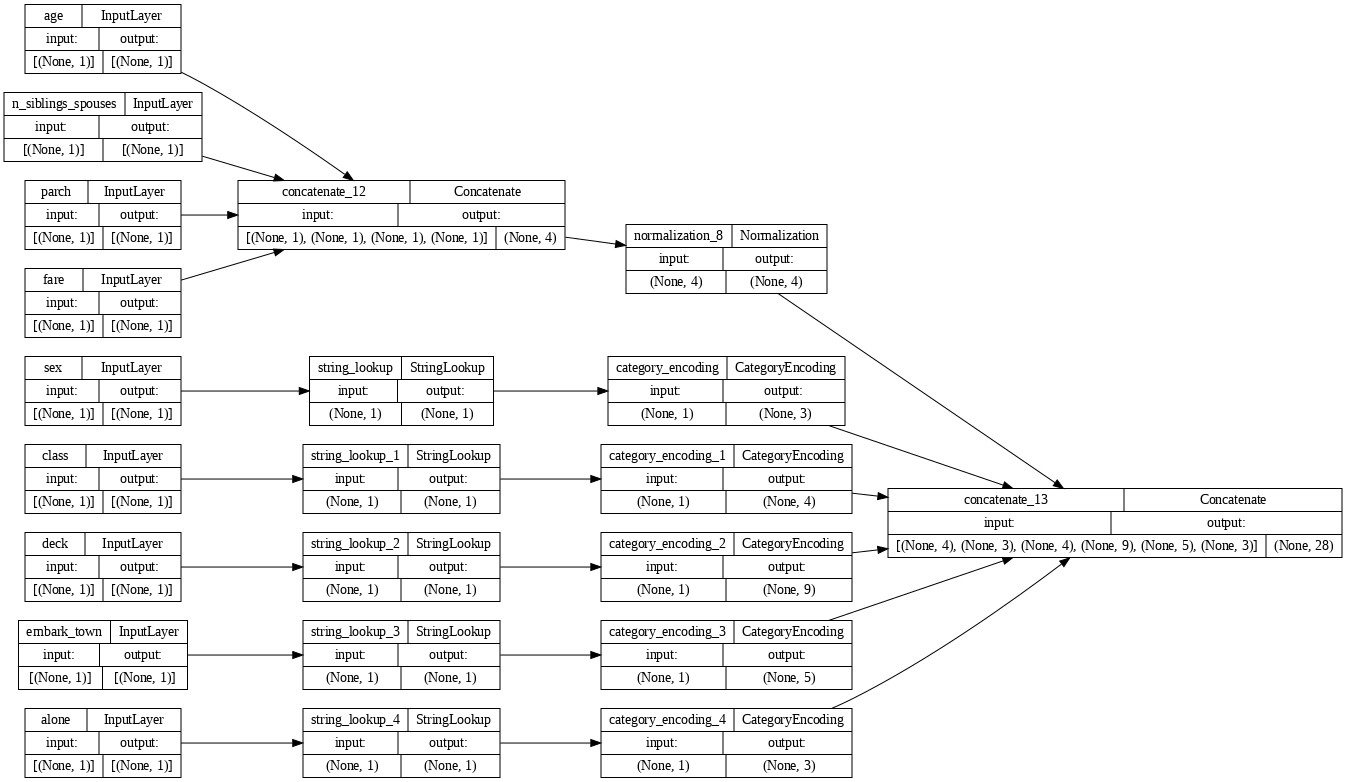

In [93]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [94]:
titanic_features_dict = {name: np.array(value)
                         for name, value in titanic_features.items()}

In [95]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [96]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [101]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 0.5961
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5023
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4670
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4484
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4360
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4298
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4245
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4238
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4214
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.4208


In [102]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

In [103]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-2.008]], shape=(1, 1), dtype=float32)
tf.Tensor([[-2.008]], shape=(1, 1), dtype=float32)
